In [5]:
#     Task 1: Read given data into DataFrame in python “Cat_Human.csv”. Perform Data cleaning.
import pandas as pd

df=pd.read_csv('Cat_human.csv')
df=df.drop_duplicates()
df = df.loc[:, ~df.columns.duplicated()]
df=df.dropna(axis=1, how='all')
df=df.dropna(axis=0, how='all')
df

,Color,Eye_color,Height,Legs,Moustache,Tail,Weight,label
0,No,black,5.14,2,No,No,70.000000,human
1,No,brown,6.80,2,No,No,64.400000,human
2,Yes,brown,5.00,2,Yes,No,64.800000,human
3,No,blue,5.90,2,No,No,78.800000,human
4,No,blue,6.56,2,No,No,73.200000,human
...,...,...,...,...,...,...,...,...
195,brown,gray,1.14,4,Yes,Yes,2.304511,Cat
196,white,yellow,1.39,4,Yes,Yes,5.687970,Cat
197,white,black,0.53,4,Yes,Yes,6.364662,Cat
198,brown,green,1.03,4,Yes,Yes,6.590226,Cat


In [17]:
#    Task 2: After data cleaning, you are required to prepare your dataset for training.
#            • Separate features and labels.
#            • Feature scaling/Normalization
#            • Perform Label Encoding
#            • Split dataset into training and testing data




df
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

df
X=df[['Height','Weight','Legs']]
y=df['label']

#scaling:
S=MinMaxScaler()
X_scaled=S.fit_transform(X)


L=LabelEncoder()
y_encoded=L.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=40)
print("Training data of X is as: ",X_train)
print("Training data of y is as: ",y_train)

print("Testing data of X is as: ",X_test)
print("Testing data of y is as: ",y_test)

Training data of X is as:  [[8.14814815e-01 9.14032870e-01 0.00000000e+00]
 [6.17283951e-02 2.47141241e-02 1.00000000e+00]
 [8.11728395e-01 7.72439949e-01 0.00000000e+00]
 [1.51234568e-01 3.61206429e-02 1.00000000e+00]
 [8.67283951e-01 6.35903919e-01 0.00000000e+00]
 [8.95061728e-01 8.28065740e-01 0.00000000e+00]
 [9.22839506e-01 5.70164349e-01 0.00000000e+00]
 [1.34259259e-01 3.99228159e-02 1.00000000e+00]
 [9.93827160e-01 7.52212389e-01 0.00000000e+00]
 [1.01851852e-01 1.71097782e-02 1.00000000e+00]
 [6.48148148e-02 1.14065188e-02 1.00000000e+00]
 [9.53703704e-01 5.85335019e-01 0.00000000e+00]
 [9.25925926e-02 4.84777050e-02 1.00000000e+00]
 [9.75308642e-01 5.60050569e-01 0.00000000e+00]
 [1.37345679e-01 6.55874832e-02 1.00000000e+00]
 [8.24074074e-01 5.65107459e-01 0.00000000e+00]
 [2.77777778e-02 5.32304212e-02 1.00000000e+00]
 [9.01234568e-01 6.51074589e-01 0.00000000e+00]
 [9.41358025e-02 6.65380265e-03 1.00000000e+00]
 [1.08024691e-01 6.46369400e-02 1.00000000e+00]
 [8.02469136e

In [25]:
#      Task 3: Display confusion matrix and generate report of f1-score, recall and precision.
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, mean_squared_error
from math import sqrt


# Create logistic regression model
classification_model = LogisticRegression()
classification_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(classification_model, 'model.pkl')

# Save the preprocessing objects
joblib.dump(S, 'scaler.pkl')
joblib.dump(L, 'label_encoder.pkl')

# Predict on the test set
y_pred = classification_model.predict(X_test)



#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

#precision score
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

#recall score
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)


Confusion Matrix:
[[21  0]
 [ 0 19]]
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


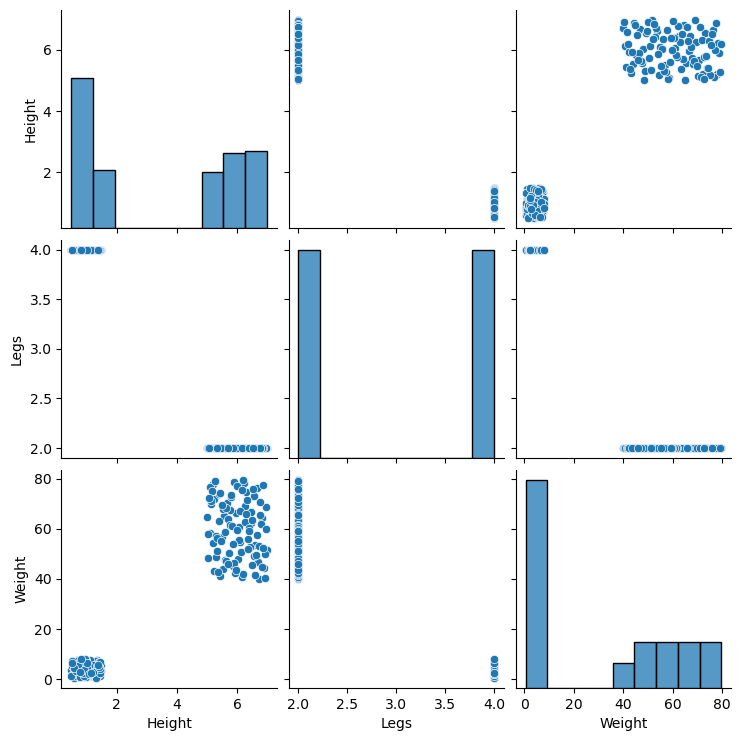

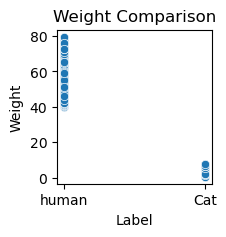

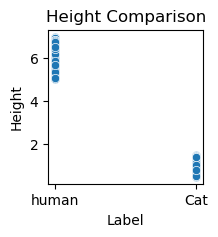

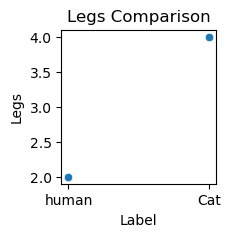

In [30]:
#    plots

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import joblib

# Inverse transform the predicted labels back to original class names
y_pred_names = L.inverse_transform(y_pred)

# Define a custom color map for scatter plot
cmap = ListedColormap(['red', 'green', 'blue'])

# Visualize the dataset
sns.pairplot(df)
plt.show()


plt.figure(figsize=(2, 2))
sns.scatterplot(data=df, x='label', y='Weight')
plt.xlabel('Label')
plt.ylabel('Weight')
plt.title('Weight Comparison')
plt.show()

plt.figure(figsize=(2, 2))
sns.scatterplot(data=df, x='label', y='Height')
plt.xlabel('Label')
plt.ylabel('Height')
plt.title('Height Comparison')
plt.show()


plt.figure(figsize=(2, 2))
sns.scatterplot(data=df, x='label', y='Legs')
plt.xlabel('Label')
plt.ylabel('Legs')
plt.title('Legs Comparison')
plt.show()
